In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import env
import wrangle
import scipy.stats
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(123)
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Acquire Data

In [2]:
df = wrangle.wrangle_zillow()

Acquiring data from SQL database


In [3]:
df.head(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,yearbuilt,location
52440,3,2.0,1762,6317,522000,1955,LA
52439,3,1.0,1032,876,49546,1954,LA


### Split Data: train, validate, test

In [4]:
train, validate, test = wrangle.split_zillow_data(df)

In [5]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,yearbuilt,location
442,4,2.0,1792,6733,585000,1956,Orange
45878,2,1.5,1712,925,82288,1968,Ventura
45857,3,2.0,1422,1023,79348,1955,LA
11954,3,2.0,1044,2628,202526,1958,LA
28541,3,1.0,1464,5397,459000,1952,LA


### Exploratory Questions: 
- Why do some properties have a much higher value than others when they are located so close to each other? 
- Why are some properties valued so differently from others when they have nearly the same physical attributes but only differ in location? 
- Which has a greater influence on home value: number of bathrooms or number of bedrooms?

### Question 1: Why do some properties have a much higher value than others when they are located so close to each other?

In [6]:
train_Ventura = train[train.location == 'Ventura']

In [7]:
train_LA = train[train.location == 'LA']

In [8]:
train_Orange = train[train.location == 'Orange']

### Ventura Homes

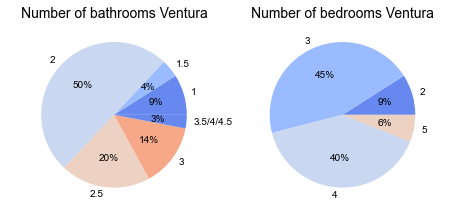

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

#define data
data1 = [9, 4, 50, 20, 14, 3]
labels1 = ['1', '1.5', '2', '2.5', '3', '3.5/4/4.5']
colors = sns.color_palette('coolwarm')[0:5]

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Number of bathrooms Ventura', fontdict = {'fontsize' : 14})

data2 = [9, 45, 40, 6]
labels2 = [2, 3, 4, 5]

ax2.pie(data2, labels = labels2, colors = colors, autopct='%.0f%%')
ax2.set_title("Number of bedrooms Ventura", fontdict = {'fontsize' : 14})
plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})


Key Takeaways: 
- Only subsets with significant percentages are highlighted below
- Homes sold in Ventura in 2017: 50% had 2 bathrooms, 20% had 2.5 bathrooms, 14% had 3 bathrooms. 
- Homes sold in Ventura in 2017: 45% had 3 bedrooms, 40% had 4 bedrooms, 9% had 2 bedrooms.

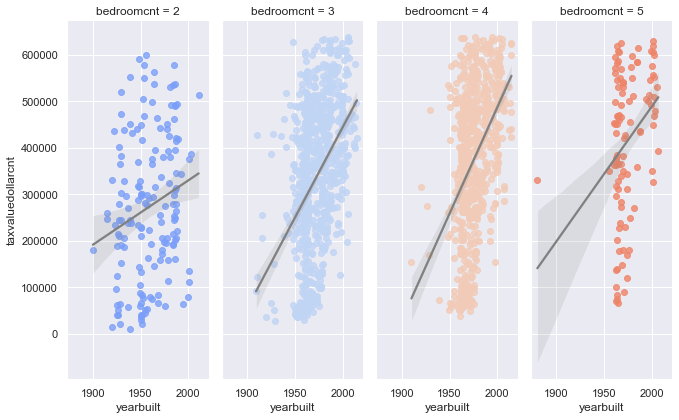

In [10]:
a = sns.lmplot(x="yearbuilt", y="taxvaluedollarcnt", hue="bedroomcnt", col="bedroomcnt",
               data=train_Ventura, line_kws={'color': 'grey'}, palette='coolwarm', height=6, aspect=.4, x_jitter=.1)
plt.tight_layout()

Key takeaways: 
- Because 85% of the homes sold in Ventura had 3 or 4 bedrooms, we can assume a strong positive linear relationship between year built and home tax value.
- While still having a slight positive linear relationship, the build year has less influence on 2 bedroom home values

In [11]:
mode_bathrooms_Ventura = train_Ventura.bathroomcnt.isin([1, 1.5, 2, 2.5, 3])
mo_bath_V = train_Ventura[mode_bathrooms_Ventura]

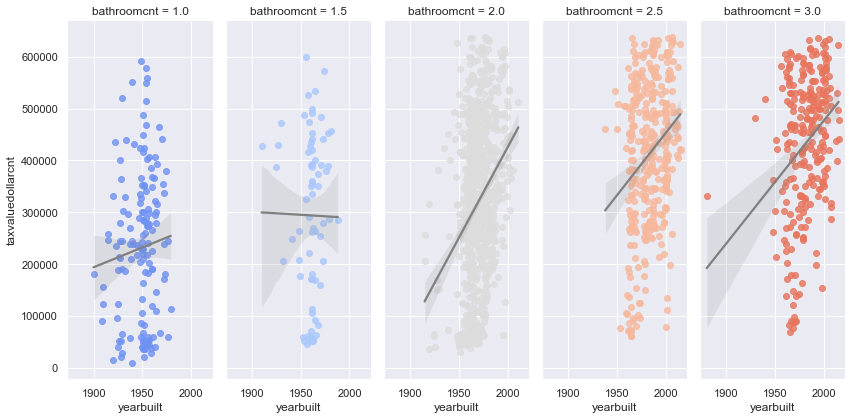

In [12]:

a = sns.lmplot(x="yearbuilt", y="taxvaluedollarcnt", hue="bathroomcnt", col="bathroomcnt",
               data=mo_bath_V, line_kws={'color': 'grey'}, palette='coolwarm', height=6, aspect=.4, x_jitter=.1)
plt.tight_layout()

Key takeaways: 
- Because 84% of the homes sold in Ventura had 2, 2.5, or 3 bathrooms, we can assume a strong positive linear relationship between year built and home tax value.
- 9% of homes had one bathroom: homes in this subset show a slight positive linear relationship
- 4% of homes had 1.5 bathrooms: homes in this subset show a slight negative linear relationship

Text(0.5, 1.0, 'How does square feet affect property tax value in Ventura?')

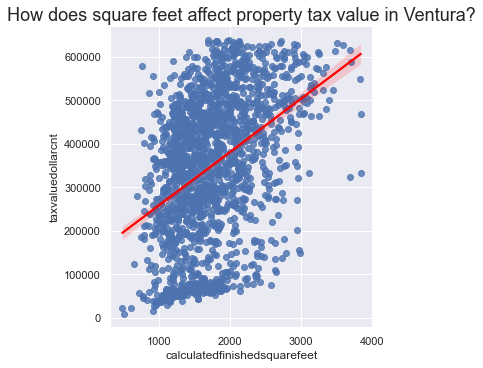

In [13]:
a = sns.lmplot(x="calculatedfinishedsquarefeet", y="taxvaluedollarcnt",
               data=train_Ventura, line_kws={'color': 'red'}, palette = 'coolwarm')
plt.title('How does square feet affect property tax value in Ventura?', fontdict = {'fontsize' : 18})

### Irrespective of bedroom count or bathroom count, on average,  as square feet increases  property value increases

Key takeaway: 
- As square feet increases, property value increases

### Orange County Homes

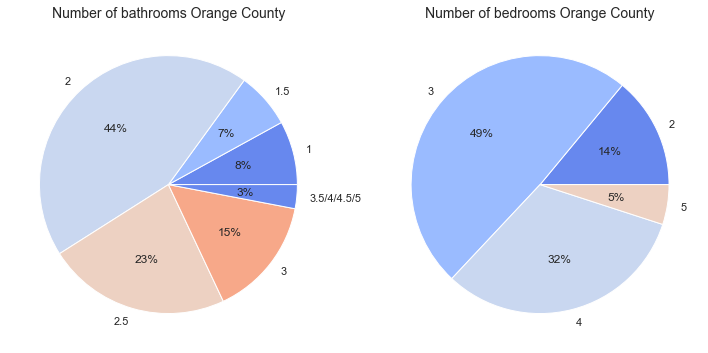

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

#define data
data1 = [8, 7, 44, 23, 15, 3]
labels1 = ['1', '1.5', '2', '2.5', '3', '3.5/4/4.5/5']
colors = sns.color_palette('coolwarm')[0:5]

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Number of bathrooms Orange County', fontdict = {'fontsize' : 14})

data2 = [14, 49, 32, 5]
labels2 = [2, 3, 4, 5]

ax2.pie(data2, labels = labels2, colors = colors, autopct='%.0f%%')
ax2.set_title("Number of bedrooms Orange County", fontdict = {'fontsize' : 14})
plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

Key Takeaways: 
- For the purpose of analysis I only highlight the majority percentages in each chart
- For homes sold in Orange County in 2017: 44% had 2 bathrooms, 23% had 2.5 bathrooms, and 15% had 3 bathrooms. 
- For homes sold in Orange County in 2017: 49% had 3 bedrooms, 32% had 4 bedrooms, and 14% had 2 bedrooms.

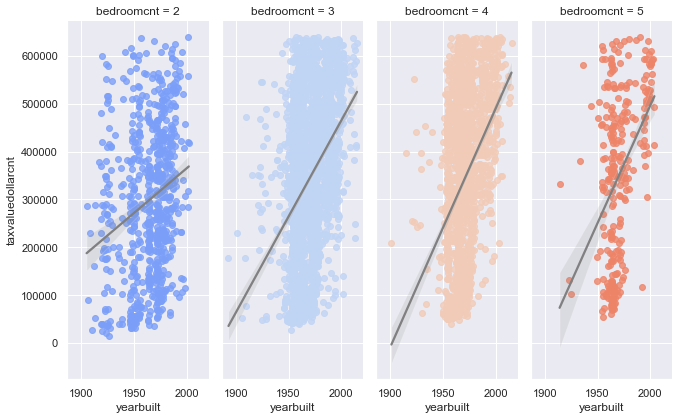

In [15]:
m = sns.lmplot(x="yearbuilt", y="taxvaluedollarcnt", hue="bedroomcnt", col="bedroomcnt",
               data=train_Orange, line_kws={'color': 'grey'}, palette='coolwarm', height=6, aspect=.4, x_jitter=.1)

Key Takeaways: 
- As build year increases, home value increases irrespective of bedroom count 
- 86 % of Orange county homes (3/4/5 bedroom) have a strong positive linear relationship.
- 14% of Orange county homes (2 bedroom) have a slight positive linear relationship.

In [16]:
mode_bathrooms_Orange = train_Orange.bathroomcnt.isin([1, 1.5, 2, 2.5, 3])
mo_bath_O = train_Orange[mode_bathrooms_Orange]

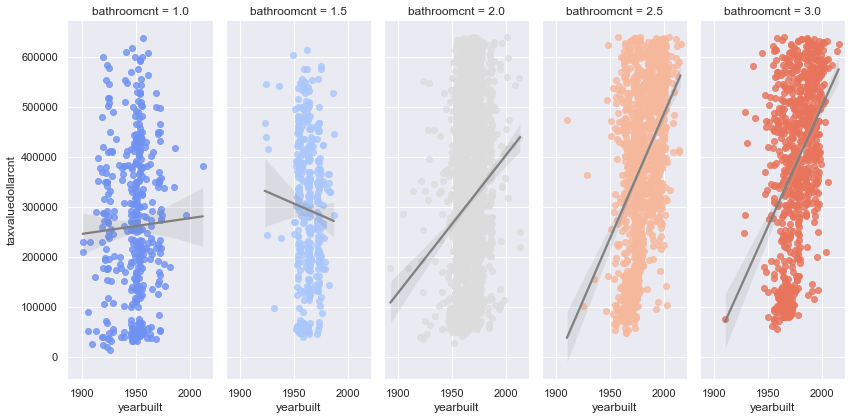

In [17]:
p = sns.lmplot(x="yearbuilt", y="taxvaluedollarcnt", hue="bathroomcnt", col="bathroomcnt",
               data=mo_bath_O, line_kws={'color': 'grey'}, palette='coolwarm', height=6, aspect=.4, x_jitter=.1)

Key takeaways: 
- 82% of homes (2/2.5/3 bathrooms) have a moderate to strong positive linear relationship
- 7% of homes (1.5 bathrooms) have a moderate negative linear relationship 
- 8% of homes (1 bathroom) have a weak positive linear relationship

Text(0.5, 1.0, 'How does square feet affect property tax value in Orange County?')

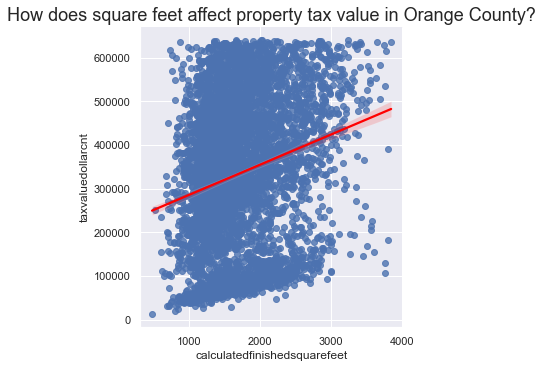

In [18]:
a = sns.lmplot(x="calculatedfinishedsquarefeet", y="taxvaluedollarcnt",
               data=train_Orange, line_kws={'color': 'red'}, palette = 'coolwarm')
plt.title('How does square feet affect property tax value in Orange County?', fontdict = {'fontsize' : 18})

### Irrespective of bedroom count or bathroom count, on average,  as square feet increases  property value increases

### LA Homes

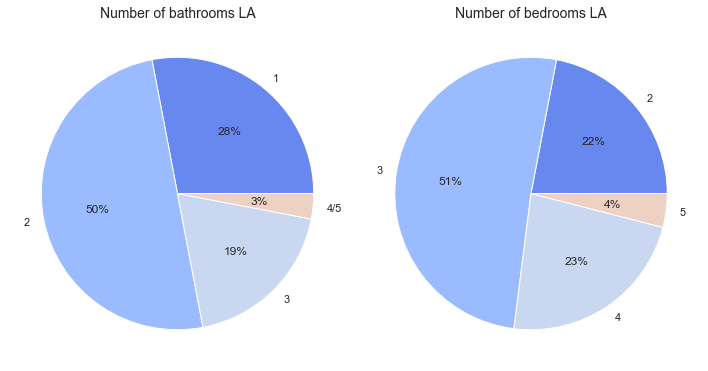

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

#define data
data1 = [28, 50, 19, 3]
labels1 = ['1', '2', '3', '4/5']
colors = sns.color_palette('coolwarm')[0:5]

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Number of bathrooms LA', fontdict = {'fontsize' : 14})

data2 = [22, 51, 23, 4]
labels2 = [2, 3, 4, 5]

ax2.pie(data2, labels = labels2, colors = colors, autopct='%.0f%%')
ax2.set_title("Number of bedrooms LA",  fontdict = {'fontsize' : 14})
plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

Key Takeaways: 
- For the purpose of analysis I only highlight the majority percentages in each chart
- For homes sold in LA County in 2017: 50% had 2 bathrooms, 28% had 1 bathrooms, and 19% had 3 bathrooms. 
- For homes sold in Orange County in 2017: 51% had 3 bedrooms, 23% had 4 bedrooms, and 22% had 2 bedrooms.

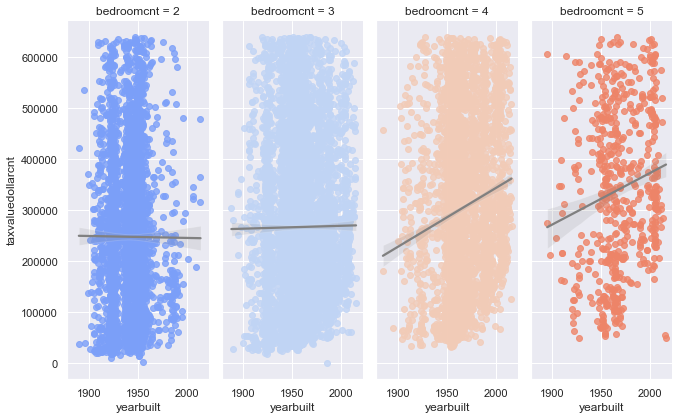

In [20]:
r = sns.lmplot(x="yearbuilt", y="taxvaluedollarcnt", hue="bedroomcnt", col="bedroomcnt",
               data=train_LA, line_kws={'color': 'grey'}, palette='coolwarm', height=6, aspect=.4, x_jitter=.1)

Key Takeaways: 
- 27% of LA county homes (4/5 bedroom) have a moderate positive linear relationship between the year a home is built and its actual property tax value.
- 73% of LA county homes (2/3 bedroom) have no significant relationship between the year a home is built and its actual property tax value.


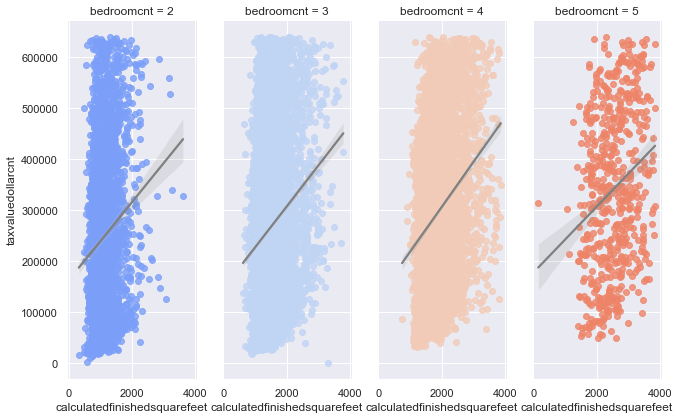

In [21]:
z = sns.lmplot(x="calculatedfinishedsquarefeet", y="taxvaluedollarcnt", hue="bedroomcnt", col="bedroomcnt",
               data=train_LA, line_kws={'color': 'grey'},palette='coolwarm', height=6, aspect=.4, x_jitter=.1)

Text(0.5, 1.0, 'How does square feet affect property tax value in LA County?')

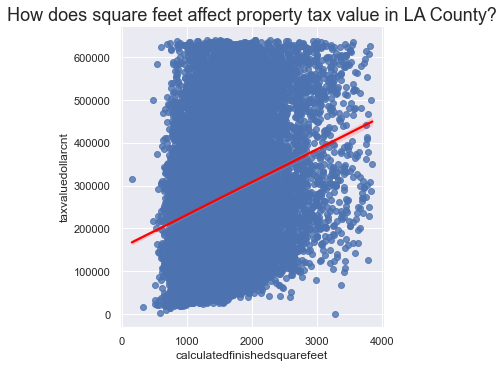

In [22]:
a = sns.lmplot(x="calculatedfinishedsquarefeet", y="taxvaluedollarcnt",
               data=train_LA, line_kws={'color': 'red'}, palette = 'coolwarm')
plt.title('How does square feet affect property tax value in LA County?', fontdict = {'fontsize' : 18})

### Irrespective of bedroom count or bathroom count, on average,  as square feet increases  property value increases

Statistics Review 

In [23]:
train.calculatedfinishedsquarefeet.mean()

1617.205793242747

In [24]:
train.calculatedfinishedsquarefeet.min()

152

In [25]:
train.calculatedfinishedsquarefeet.max()

3857

In [26]:
train.calculatedfinishedsquarefeet.var()

321659.8564214691

In [27]:
train.calculatedfinishedsquarefeet.std()

567.1506470255227

In [28]:
train.calculatedfinishedsquarefeet.median()

1502.0

Requires an NP array 

Shape, Reshape, Ravel 

In [29]:
train.calculatedfinishedsquarefeet.shape

(21784,)

In [30]:
squarefeet = train.calculatedfinishedsquarefeet
squarefeet.shape

(21784,)

sequence, repetition and random numbers 

In [31]:
np.arange(1, 5, dtype = 'float')

array([1., 2., 3., 4.])

In [32]:
#use shift tab to get the directions 
np.arange(1, 20, 3)

array([ 1,  4,  7, 10, 13, 16, 19])

In [33]:
#the third number says how many numbers you want between 1 and 20
np.linspace(1, 20, 3)

array([ 1. , 10.5, 20. ])

In [34]:
#10 numbers generated generated 
np.logspace(1, 50, 10)

array([1.00000000e+01, 2.78255940e+06, 7.74263683e+11, 2.15443469e+17,
       5.99484250e+22, 1.66810054e+28, 4.64158883e+33, 1.29154967e+39,
       3.59381366e+44, 1.00000000e+50])

In [35]:
np.zeros([1, 5])

array([[0., 0., 0., 0., 0.]])

In [36]:
np.zeros([1, 2, 3])

array([[[0., 0., 0.],
        [0., 0., 0.]]])

In [37]:
#10 rows, 2 columns 
np.ones([10, 2])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [38]:
#repeat a particular sequence three times 
np.tile([1, 2], 3)

array([1, 2, 1, 2, 1, 2])

In [39]:
#calculate first element of the list, then second element of the list 
np.repeat([1, 2], 3)

array([1, 1, 1, 2, 2, 2])

In [40]:
#random number 3 rows, 3 columns 
#between 0 and 1 
np.random.rand(3, 3)

array([[0.50387965, 0.14282533, 0.58883353],
       [0.72917553, 0.35612103, 0.16859698],
       [0.19259954, 0.0190304 , 0.17842522]])

In [41]:
np.random.seed(1)
np.random.randint(0, 100, [3, 3])

array([[37, 12, 72],
       [ 9, 75,  5],
       [79, 64, 16]])

In [42]:
#np.unique() - count unique numbers in np array 
#np.unique(npa_array, return_counts = True)- how many times each number occurs in nparray

Where()

In [43]:
arr = np.array([8, 94, 8, 56, 1, 3, 4, 5, 7])

In [44]:
arr

array([ 8, 94,  8, 56,  1,  3,  4,  5,  7])

In [45]:
np.where(arr>10)


(array([1, 3]),)

In [46]:
index = np.where(arr>10)
arr[index]

array([94, 56])

In [47]:
np.where(arr<10)


(array([0, 2, 4, 5, 6, 7, 8]),)

In [48]:
index2 = np.where(arr<10)
arr[index2]

array([8, 8, 1, 3, 4, 5, 7])

In [49]:
arr>10

array([False,  True, False,  True, False, False, False, False, False])

In [50]:
arr[arr>10]

array([94, 56])

In [51]:
arr[arr<10]

array([8, 8, 1, 3, 4, 5, 7])

In [52]:
arr.max()

94

In [53]:
#what is the index of the maximum 
arr.argmax()

1

In [54]:
arr.argmin()

4

In [55]:
arr[arr.argmin()]

1

File Read and Write 

In [56]:
npa2d = np.array([0, 2, 3, 0, 3, 4])

In [57]:
np.savetxt('npa2d.csv', npa2d, delimiter=',')

Concatenate and Sorting 

In [58]:
npa2d

array([0, 2, 3, 0, 3, 4])

In [59]:
np.concatenate([npa2d, npa2d], axis = 0)

array([0, 2, 3, 0, 3, 4, 0, 2, 3, 0, 3, 4])

In [60]:
npa = np.vstack([npa2d, npa2d])
npa

array([[0, 2, 3, 0, 3, 4],
       [0, 2, 3, 0, 3, 4]])

In [61]:
npa.sort()

In [62]:
npa

array([[0, 0, 2, 3, 3, 4],
       [0, 0, 2, 3, 3, 4]])

Dates in Numpy Array 

In [63]:
d = np.datetime64('2020-12-01 23:34:23')

In [64]:
d

numpy.datetime64('2020-12-01T23:34:23')

In [65]:
#added in seconds 
d + 10

numpy.datetime64('2020-12-01T23:34:33')

In [66]:
# add one day 
oneday = np.timedelta64(1, 'D')

In [67]:
oneday

numpy.timedelta64(1,'D')

In [68]:
d + oneday

numpy.datetime64('2020-12-02T23:34:23')

In [69]:
oneminute = np.timedelta64(1, 'm')

In [70]:
d + oneminute

numpy.datetime64('2020-12-01T23:35:23')

Pandas Review 

### Dataframe and Series 

In [71]:
#create a dataframe
data = {'fruit': [1, 3, 4, 5], 'vegetable': [7, 8, 9, 10]}

In [72]:
#now we have dictionary with two keys
data

{'fruit': [1, 3, 4, 5], 'vegetable': [7, 8, 9, 10]}

In [73]:
type(data)

dict

In [74]:
df = pd.DataFrame(data)
df

,fruit,vegetable
0,1,7
1,3,8
2,4,9
3,5,10


In [75]:
df['fruit']

0    1
1    3
2    4
3    5
Name: fruit, dtype: int64

In [76]:
type(df['fruit'])

pandas.core.series.Series

In [77]:
df['vegetable']

0     7
1     8
2     9
3    10
Name: vegetable, dtype: int64

In [78]:
df.vegetable

0     7
1     8
2     9
3    10
Name: vegetable, dtype: int64

In [79]:
#df.info will give you information about dataframe 
#df.describe more information 
#df.shape
#df.duplicated().sum() - says if there are duplicated rows
#df.duplicated(subset=['column_name']).sum() - if a specific column has duplicate rows 
#df.append(df) - append a dataframe with another dataframe 
#df.drop_duplicates() - drop duplicates 
#df.columns = ['0', '1'] - rename columns
#df.rename(columns={'currentname': 'newname'})
#df.isnull().sum() = show null values 
#df.dropna() - drop null values 
#df.dropna(axis = 1) - drop all columns with null values 
#df.fillna('mean') - fill with mean values


In [80]:
x = lambda a: a*a

In [81]:
x(3)

9

In [82]:
x(4)

16

In [83]:
mean_meta = train['bedroomcnt'].mean()

In [84]:
mean_meta

3.1644785163422697

In [85]:
#will fill null data with mean of column 
#train['bedroomcnt'].apply(lambda x: x if x == x else mean_meta)

### Types of Linear Regression 

Simple Linear Regression 
- define goodness of fit metric for each possible line 
- gradient descent algorithm - get estimated parameters: interpret, use to form predictions

Multiple Linear Regression 
- fit more complex relationships than just a line 
- incorporate more inputs: square feet, number bedrooms, number baths, year built

Assessing Performance of the Model 

In [86]:
#when we have overfitted model there will be low bias 
#when we have underfitted model there will be low variance, high bias
#when we have best fitted model have min bias and min variance, min MSE
#HSE = bias^2 + variance 


In [87]:
df = wrangle.acquire_zillow()

Acquiring data from SQL database


In [88]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,propertylandusedesc,taxamount,taxvaluedollarcnt,yearbuilt,fips,transactiondate
0,4.0,3.5,3100.0,Single Family Residential,11013.72,1023282.0,1998.0,6059.0,2017-01-01
1,2.0,1.0,1465.0,Single Family Residential,5672.48,464000.0,1967.0,6111.0,2017-01-01
2,3.0,2.0,1243.0,Single Family Residential,6488.30,564778.0,1962.0,6059.0,2017-01-01
3,4.0,3.0,2376.0,Single Family Residential,1777.51,145143.0,1970.0,6037.0,2017-01-01
4,4.0,3.0,2962.0,Single Family Residential,9516.26,773303.0,1950.0,6037.0,2017-01-01


In [89]:
#this is a good point to do df.desc
#no df.desc available for this dataset 
#possibly available in SQL 

In [90]:
df.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'propertylandusedesc', 'taxamount', 'taxvaluedollarcnt', 'yearbuilt',
       'fips', 'transactiondate'],
      dtype='object')

In [91]:
len(df.columns)

9

In [92]:
df.shape

(52442, 9)

In [93]:
df['TaxValue'] = df.taxvaluedollarcnt

In [94]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,propertylandusedesc,taxamount,taxvaluedollarcnt,yearbuilt,fips,transactiondate,TaxValue
0,4.0,3.5,3100.0,Single Family Residential,11013.72,1023282.0,1998.0,6059.0,2017-01-01,1023282.0
1,2.0,1.0,1465.0,Single Family Residential,5672.48,464000.0,1967.0,6111.0,2017-01-01,464000.0
2,3.0,2.0,1243.0,Single Family Residential,6488.30,564778.0,1962.0,6059.0,2017-01-01,564778.0
3,4.0,3.0,2376.0,Single Family Residential,1777.51,145143.0,1970.0,6037.0,2017-01-01,145143.0
4,4.0,3.0,2962.0,Single Family Residential,9516.26,773303.0,1950.0,6037.0,2017-01-01,773303.0


In [95]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,yearbuilt,fips,TaxValue
count,52442.000000,52442.000000,52360.000000,52438.000000,5.244100e+04,52326.000000,52442.000000,5.244100e+04
mean,3.300675,2.299397,1922.874083,6453.451945,5.296830e+05,1963.393820,6049.131917,5.296830e+05
std,0.949086,1.022764,1004.363491,8755.495483,7.518883e+05,23.133355,21.028933,7.518883e+05
min,0.000000,0.000000,128.000000,49.180000,1.000000e+03,1878.000000,6037.000000,1.000000e+03
25%,3.000000,2.000000,1268.000000,2656.250000,1.937500e+05,1950.000000,6037.000000,1.937500e+05
50%,3.000000,2.000000,1659.000000,4647.730000,3.736120e+05,1961.000000,6037.000000,3.736120e+05
75%,4.000000,3.000000,2306.000000,7377.445000,6.193010e+05,1979.000000,6059.000000,6.193010e+05
max,14.000000,18.000000,21929.000000,586639.300000,4.906124e+07,2016.000000,6111.000000,4.906124e+07


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52442 non-null  float64
 1   bathroomcnt                   52442 non-null  float64
 2   calculatedfinishedsquarefeet  52360 non-null  float64
 3   propertylandusedesc           52442 non-null  object 
 4   taxamount                     52438 non-null  float64
 5   taxvaluedollarcnt             52441 non-null  float64
 6   yearbuilt                     52326 non-null  float64
 7   fips                          52442 non-null  float64
 8   transactiondate               52442 non-null  object 
 9   TaxValue                      52441 non-null  float64
dtypes: float64(8), object(2)
memory usage: 4.0+ MB


In [97]:
df.isnull().sum()

bedroomcnt                        0
bathroomcnt                       0
calculatedfinishedsquarefeet     82
propertylandusedesc               0
taxamount                         4
taxvaluedollarcnt                 1
yearbuilt                       116
fips                              0
transactiondate                   0
TaxValue                          1
dtype: int64

In [98]:
df = wrangle.wrangle_zillow()

Acquiring data from SQL database


In [99]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,yearbuilt,location
52440,3,2.0,1762,6317,522000,1955,LA
52439,3,1.0,1032,876,49546,1954,LA
52438,4,2.0,1612,1107,67205,1964,Ventura
52437,2,2.0,1286,4478,354621,1940,LA
52320,3,1.0,1468,6498,523019,1949,LA


In [100]:
df.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxamount', 'taxvaluedollarcnt', 'yearbuilt', 'location'],
      dtype='object')

In [101]:
train_Ventura.drop(columns=['taxamount'], inplace=True)

In [102]:
train_Orange.drop(columns=['taxamount'], inplace=True)

In [103]:
train_LA.drop(columns=['taxamount'], inplace=True)

In [104]:
train_Ventura.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'location'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

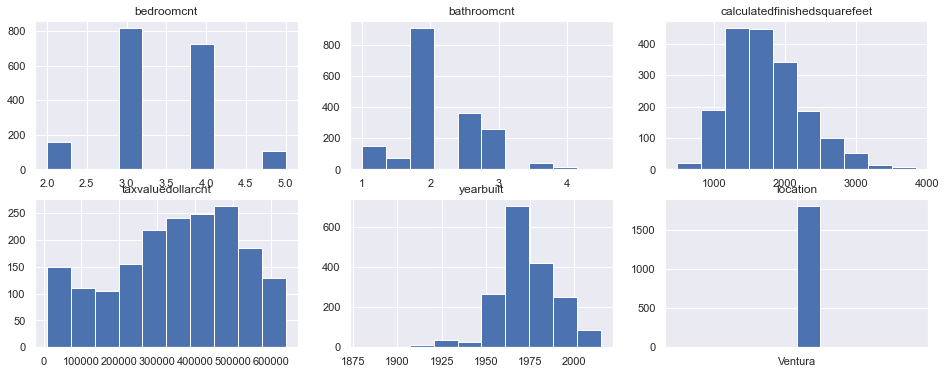

In [105]:
rows = 2 
cols = 3 

fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,6))

col = train_Ventura.columns
index = 0 

for i in range(rows):
    for j in range(cols):
        ax[i][j].hist(train_Ventura[col[index]])
        ax[i][j].set_title(col[index])
        index = index + 1
plt.tight_layout
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

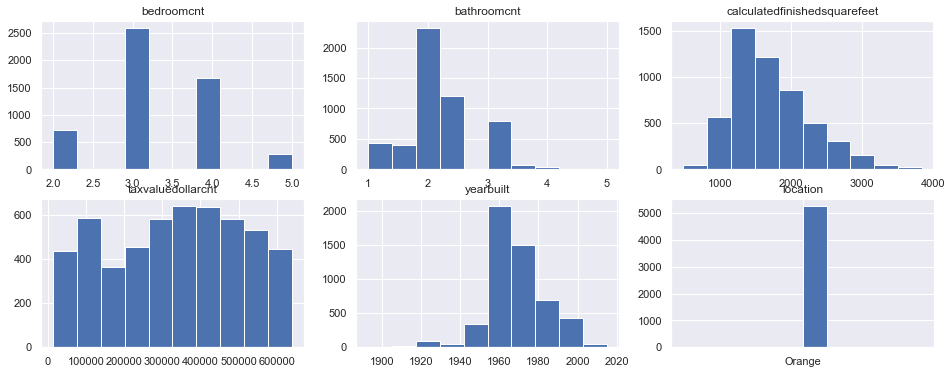

In [106]:
rows = 2 
cols = 3 

fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,6))

col = train_Orange.columns
index = 0 

for i in range(rows):
    for j in range(cols):
        ax[i][j].hist(train_Orange[col[index]])
        ax[i][j].set_title(col[index])
        index = index + 1
plt.tight_layout
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

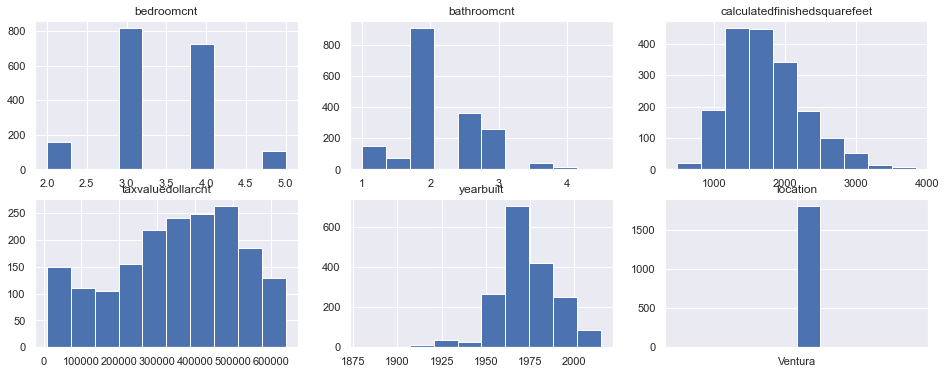

In [107]:
rows = 2 
cols = 3 

fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,6))

col = train_LA.columns
index = 0 

for i in range(rows):
    for j in range(cols):
        ax[i][j].hist(train_Ventura[col[index]])
        ax[i][j].set_title(col[index])
        index = index + 1
plt.tight_layout
plt.show

In [174]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,yearbuilt,location
442,4,2.0,1792,6733,585000,1956,Orange
45878,2,1.5,1712,925,82288,1968,Ventura
45857,3,2.0,1422,1023,79348,1955,LA
11954,3,2.0,1044,2628,202526,1958,LA
28541,3,1.0,1464,5397,459000,1952,LA


In [172]:
corrmat = train.corr()
corrmat

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,yearbuilt
bedroomcnt,1.000000,0.577787,0.606087,0.168137,0.154132,0.357040
bathroomcnt,0.577787,1.000000,0.763651,0.281721,0.267704,0.549729
calculatedfinishedsquarefeet,0.606087,0.763651,1.000000,0.301716,0.283682,0.461069
taxamount,0.168137,0.281721,0.301716,1.000000,0.932892,0.250031
taxvaluedollarcnt,0.154132,0.267704,0.283682,0.932892,1.000000,0.213045
yearbuilt,0.357040,0.549729,0.461069,0.250031,0.213045,1.000000


ValueError: could not convert string to float: 'Orange'

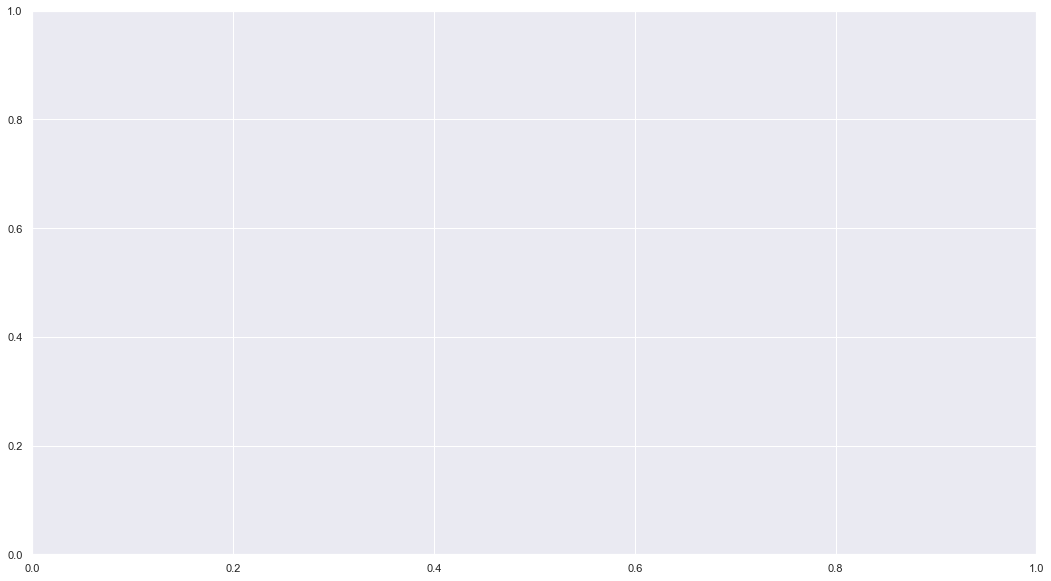

In [173]:
plt.subplots(figsize=(18,10))
sns.heatmap(train, annot=True, annot_kws={'size': 18})
plt.show()

In [108]:
corrmatV = train_Ventura.corr()
corrmatV

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt
bedroomcnt,1.000000,0.532129,0.562087,0.201209,0.211351
bathroomcnt,0.532129,1.000000,0.743977,0.370354,0.519495
calculatedfinishedsquarefeet,0.562087,0.743977,1.000000,0.402835,0.437593
taxvaluedollarcnt,0.201209,0.370354,0.402835,1.000000,0.406803
yearbuilt,0.211351,0.519495,0.437593,0.406803,1.000000


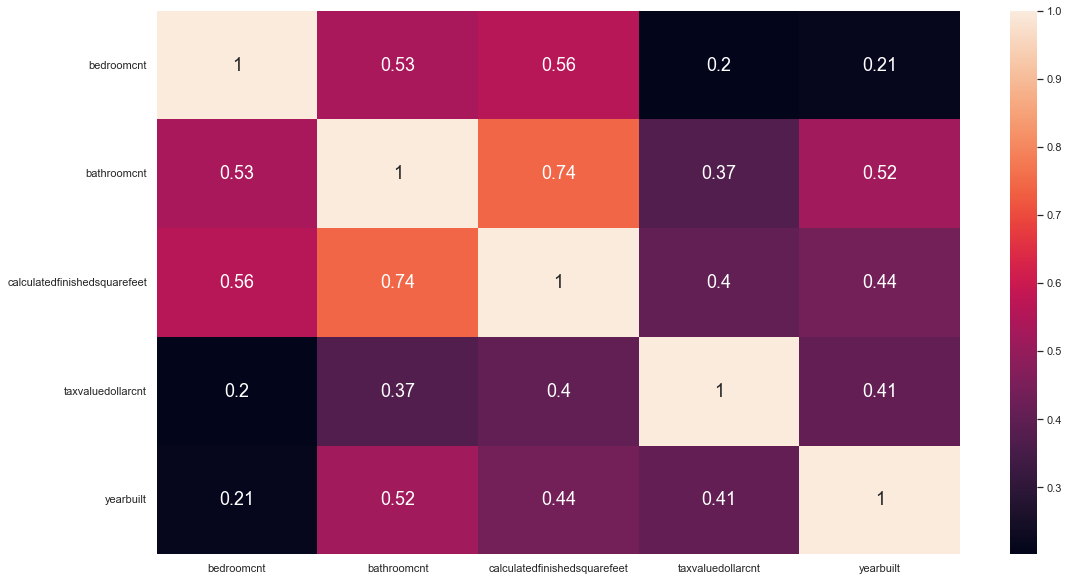

In [109]:
plt.subplots(figsize=(18,10))
sns.heatmap(corrmatV, annot=True, annot_kws={'size': 18})
plt.show()

Takeaway: 
- Multicollinearity the relationship should be less than 0.6 
- Ventura: bathroom and square feet = 0.74

In [110]:
corrmatO = train_Orange.corr()
corrmatO

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt
bedroomcnt,1.000000,0.478703,0.548015,0.070405,0.119059
bathroomcnt,0.478703,1.000000,0.731548,0.253341,0.526169
calculatedfinishedsquarefeet,0.548015,0.731548,1.000000,0.221207,0.393244
taxvaluedollarcnt,0.070405,0.253341,0.221207,1.000000,0.349777
yearbuilt,0.119059,0.526169,0.393244,0.349777,1.000000


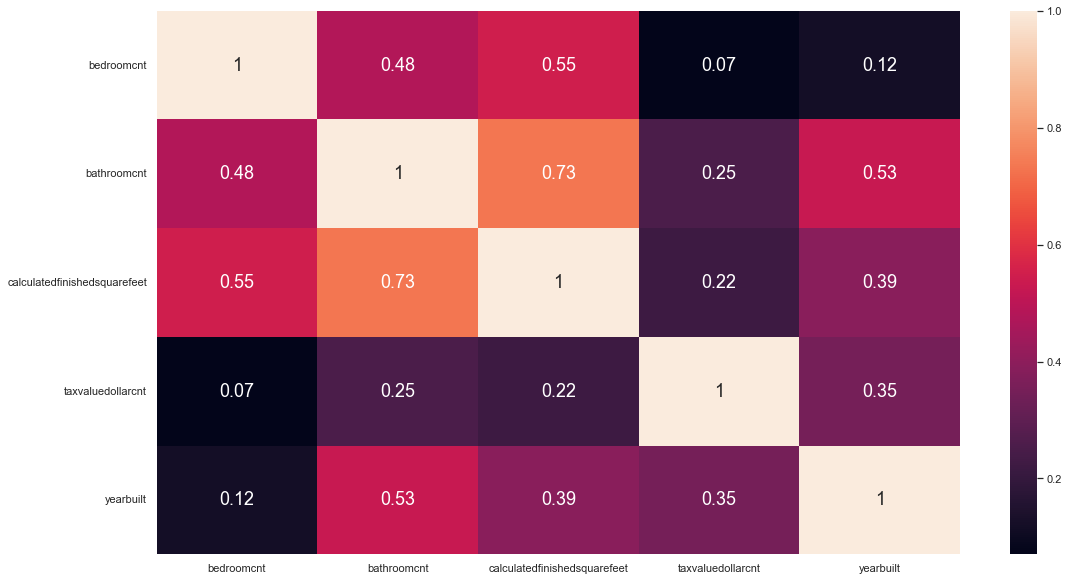

In [111]:
plt.subplots(figsize=(18,10))
sns.heatmap(corrmatO, annot=True, annot_kws={'size': 18})
plt.show()

Takeaway: 
- Orange County: Bathroom and Square feet do not pass the multicollinearity test: 0.73 > 0.6

In [112]:
corrmatLA = train_LA.corr()
corrmatLA

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt
bedroomcnt,1.000000,0.601064,0.619823,0.146084,0.400779
bathroomcnt,0.601064,1.000000,0.772003,0.237306,0.539015
calculatedfinishedsquarefeet,0.619823,0.772003,1.000000,0.266812,0.462599
taxvaluedollarcnt,0.146084,0.237306,0.266812,1.000000,0.102574
yearbuilt,0.400779,0.539015,0.462599,0.102574,1.000000


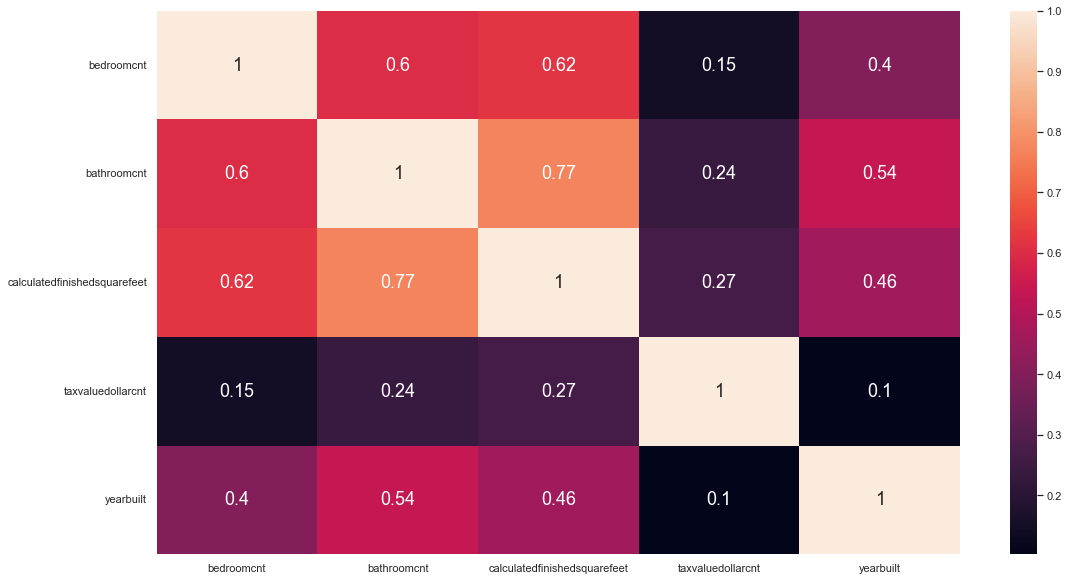

In [113]:
plt.subplots(figsize=(18,10))
sns.heatmap(corrmatLA, annot=True, annot_kws={'size': 18})
plt.show()

Takeaway: 
- Multicollinearity must be less than 0.6 
- bathroom count and square feet have a correlation of 0.77

In [114]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,yearbuilt,location
52440,3,2.0,1762,6317,522000,1955,LA
52439,3,1.0,1032,876,49546,1954,LA
52438,4,2.0,1612,1107,67205,1964,Ventura
52437,2,2.0,1286,4478,354621,1940,LA
52320,3,1.0,1468,6498,523019,1949,LA


In [157]:
train, validate, test = wrangle.split_zillow_data(df)

In [158]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train, validate, test)

In [159]:
X_train = train_scaled[['yearbuilt', 'bathroomcnt', 'calculatedfinishedsquarefeet']]
y_train = train['taxvaluedollarcnt']

X_validate = validate_scaled[['yearbuilt', 'bathroomcnt', 'calculatedfinishedsquarefeet']]
y_validate = validate['taxvaluedollarcnt']

X_test = test_scaled[['yearbuilt', 'bathroomcnt', 'calculatedfinishedsquarefeet']]
y_test = test['taxvaluedollarcnt']

In [160]:
X_train.head()

,yearbuilt,bathroomcnt,calculatedfinishedsquarefeet
442,1956,0.250,0.442645
45878,1968,0.125,0.421053
45857,1955,0.250,0.342780
11954,1958,0.250,0.240756
28541,1952,0.000,0.354116


In [161]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [162]:
y_predict = model.predict(X_test)

In [163]:
y_predict, y_test

(array([279934.34083604, 312493.0183409 , 272725.87630572, ...,
        385441.54087194, 300961.26334851, 274396.20397938]),
 12056     98834
 15520    282195
 5052     193518
 34752    596967
 31749     32250
           ...  
 2371     331370
 22932     66705
 30838    526499
 8790     182745
 25781     71617
 Name: taxvaluedollarcnt, Length: 7780, dtype: int64)

In [164]:
from sklearn.metrics import r2_score

In [165]:
r2_score(y_test, y_predict)

0.08418385511296733

In [166]:
mean_absolute_error(y_test, y_predict)

139220.2717708817

In [167]:
mean_squared_error(y_test, y_predict)

26132932062.573395

In [168]:
np.sqrt(mean_squared_error(y_test, y_predict))

161656.83425878844

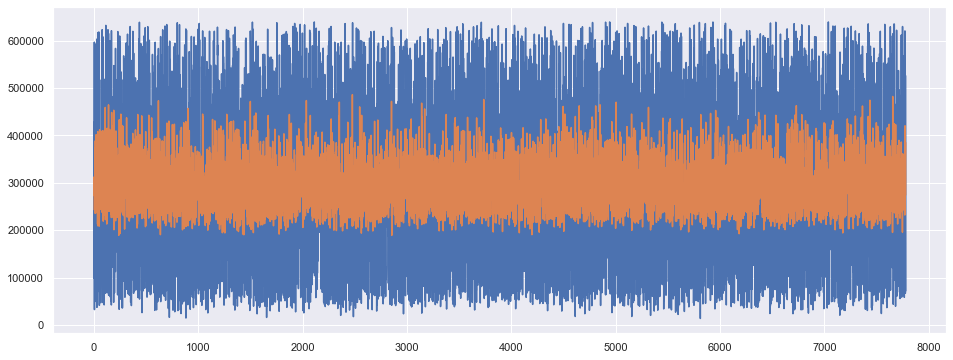

In [169]:
plt.subplots(figsize=(16,6))
x_points = list(range(len(y_test)))
plt.plot(x_points, y_test, label='y_true')
plt.plot(x_points, y_predict, label='y_predict')

In [170]:
from sklearn.model_selection import learning_curve, ShuffleSplit

In [171]:
df plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_size=np.linspace(0.1, 1, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('score')
    
    learning_curve(estimator, X, Y, cv=cv)


SyntaxError: invalid syntax (1625375376.py, line 1)